# **Micro-Projet Biostatistiques**

## Polymorphisme dans _BRCA1_

## Chargement des packages et des données

<div class="alert alert-warning"> 
    Les boîtes oranges contiennent des instructions que vous allez devoir traduire en commandes BASH.
    Une partie de la commande peut vous être donnée, à vous de la completer en remplacant les <b>[XXX]</b>.
    <br/>
    <br/>
    L'évaluation consistera en un simple questionnaire numéroté dans lequel vous devrez reporter ce par quoi vous avez remplacé ces <b>[XXX]</b>, le résultat de certaines commandes ou encore des champs de réponses libres.
</div>

In [1]:
##### cell 1

library(tidyverse)
sep <- paste0(c('\n', rep('¤', 80), '\n'))
cat(sep)

Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()




 ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ 


### Chargement du VCF

In [2]:
##### cell 2

full_vcf <- 
  read_tsv('/srv/data/pass-rs-ue3/brca1/chr17_brca1.tsv')

Rows: 4918 Columns: 2697
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2595): Ref, Alt, Func.refGene, Gene.refGene, GeneDetail.refGene, Exonic...
dbl   (97): Chr, Start, End, gnomAD_exome_ALL, gnomAD_exome_AFR, gnomAD_exom...
lgl    (5): mcap_score, mcap_sensitivity, Otherinfo2, Otherinfo6, Otherinfo9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Chargement des metadata

In [3]:
##### cell 3

metadata_path <- 
  '/srv/data/pass-rs-ue3/hg38-chr17-1kgenome/20130606_g1k_3202_samples_ped_population.txt'
metadata <- read_delim(metadata_path, delim = ' ') %>% 
  mutate(Sex = as.factor(Sex))

Rows: 3202 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (6): FamilyID, SampleID, FatherID, MotherID, Population, Superpopulation
dbl (1): Sex

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Un premier regard ...

Chaque ligne représente un SNP et les sujets font partie des variables mises en colonnes.

In [4]:
##### cell 4

dim(full_vcf)
head(full_vcf)

[1] 4918 2697

Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,⋯,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17,43000018,43000018,C,T,exonic,RPL27,NA,nonsynonymous SNV,"RPL27:NM_001349922:exon2:c.C167T:p.A56V,RPL27:NM_000988:exon3:c.C167T:p.A56V,RPL27:NM_001349921:exon3:c.C167T:p.A56V",⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
17,43000031,43000031,G,A,exonic,RPL27,NA,synonymous SNV,"RPL27:NM_001349922:exon2:c.G180A:p.K60K,RPL27:NM_000988:exon3:c.G180A:p.K60K,RPL27:NM_001349921:exon3:c.G180A:p.K60K",⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
17,43000140,43000140,C,T,intronic,RPL27,NA,NA,NA,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
17,43000159,43000162,AGAC,-,intronic,RPL27,NA,NA,NA,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
17,43000219,43000219,T,A,intronic,RPL27,NA,NA,NA,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
17,43000222,43000222,A,G,intronic,RPL27,NA,NA,NA,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


<div class="alert alert-warning"> 
    <p>
       Question 1) A propos de <code>full_vcf</code> :<br>
           &emsp; Le dataset contient les informations de 2697 SNP ? 
            <br>
           &emsp; Le dataset contient les informations de 4918 sujets ?
            <br>
           &emsp; Le dataset contient les informations de 4918 SNP ? 
            <br>
           &emsp; Le dataset contient les informations de 2697 sujets ?
            <br>
           &emsp; Le dataset contient les informations de moins de 2697 sujets ?
    </p>
</div>

In [5]:
##### cell 5

# assign the line count (equal to the number of SNP) of the vcf to a variable
n_snps <-
  nrow(full_vcf)

# assign the column count of the vcf to a variable
n_datacol <- 
  ncol(full_vcf)

In [6]:
##### cell 6

# What genes are present in the data:
table(full_vcf$Gene.refGene)


            BRCA1        BRCA1;NBR2             IFI35        IFI35;VAT1 
             1969                 1               241                 2 
     LOC101929767 LOC101929767;NBR1 LOC101929767;NBR2              NBR1 
              389                 1               123               684 
             NBR2              RND2        RND2;BRCA1             RPL27 
              687               190               233               123 
      RPL27;IFI35              VAT1         VAT1;RND2 
               43               220                12 

In [7]:
##### cell 7

# Subsetting to keep BRCA1 only:
is_brca1 <- 
  full_vcf$Gene.refGene == 'BRCA1'

brca1_vcf <- full_vcf[is_brca1, ]

<div class="alert alert-warning"> 
    Question 2) :
    Assurez-vous que le dataset ne contient désormais que des SNP présents dans <i>BRCA1</i> (vous pouvez vous aider de la commande <code>table()</code> ou d'une autre commande de votre choix).
</div>

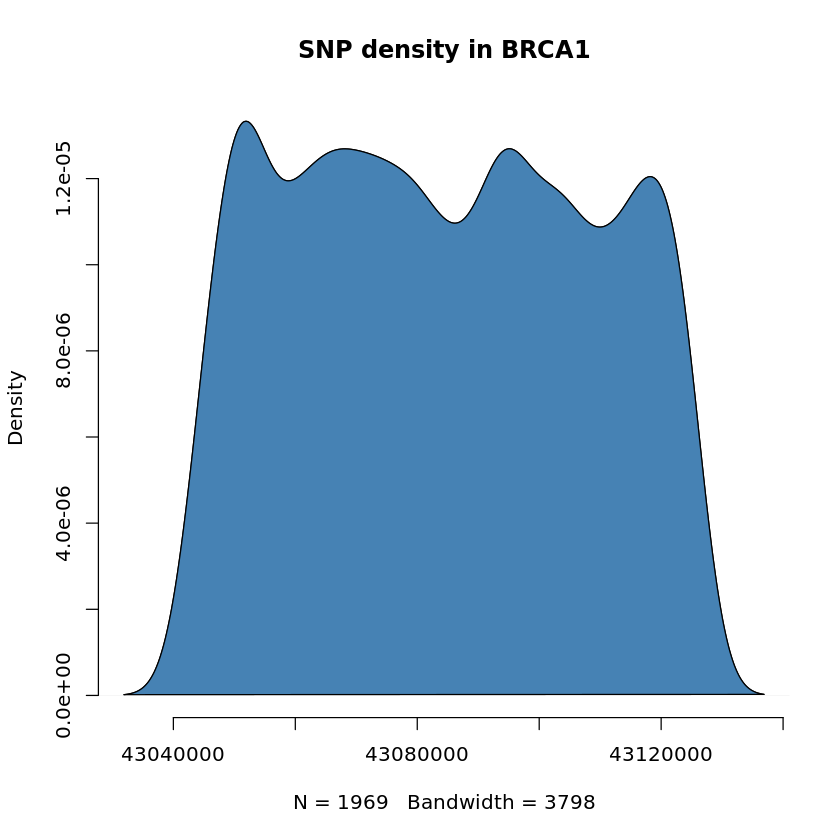

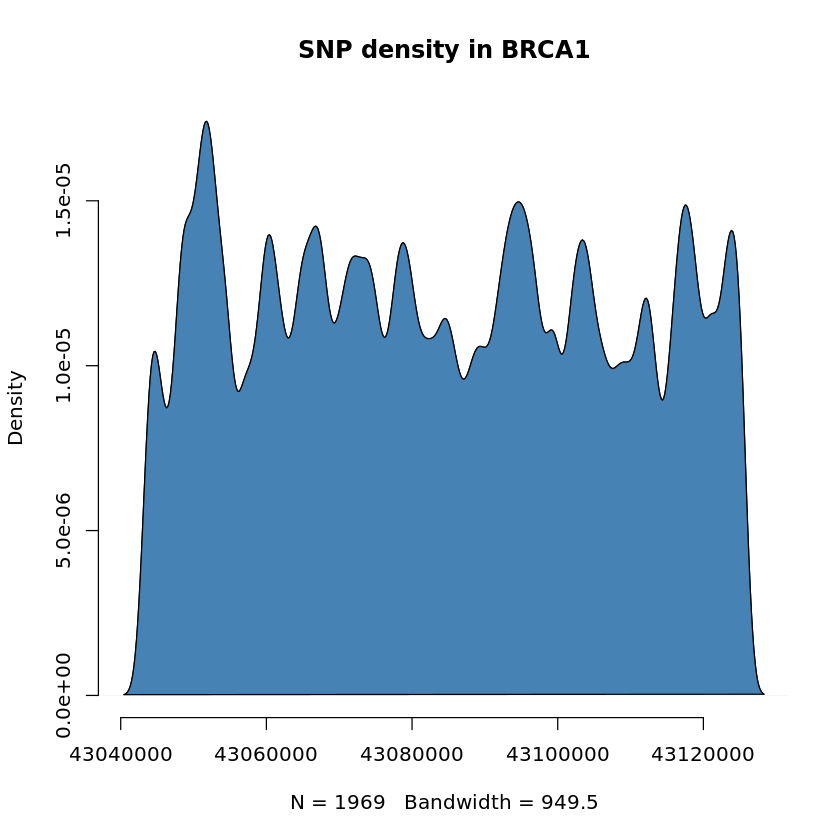

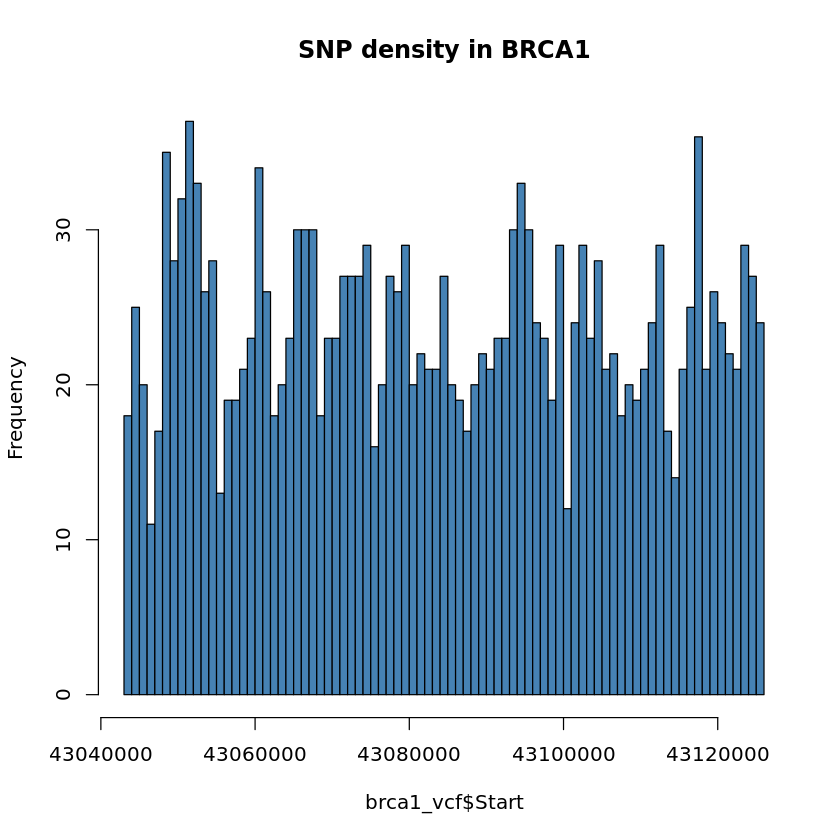

In [8]:
##### cell 8

# SNP distribution on BRCA1:
snp_density <- density(brca1_vcf$Start, adjust = 0.8)
plot(x = snp_density, frame = FALSE, main = "SNP density in BRCA1")
polygon(snp_density, col = "steelblue")

snp_density <- density(brca1_vcf$Start, adjust = 0.2)
plot(x = snp_density, frame = FALSE, main = "SNP density in BRCA1")
polygon(snp_density, col = "steelblue")


hist(x = brca1_vcf$Start, main = "SNP density in BRCA1", breaks = 1e2, col = "steelblue", freq = TRUE)

<div class="alert alert-warning"> 
    Question 3) :
        <br>
        &emsp;Ces plots représentent la densité en SNP le long du gène <i>BRCA1</i>. 
        <br>
        &emsp;Laquelle de ces représentations choisiriez vous et pourquoi (justifiez en une brève phrase) ?
</div>

## Homo et hétéro -zygotie

In [9]:
##### cell 9

# separating SNP and genotypes
brca1_snps <- 
  brca1_vcf[ ,1:149]

In [10]:
##### cell 10

# separating SNP and genotypes
brca1_samples <- 
  brca1_vcf[ ,150:n_datacol]

In [11]:
##### cell 11

# This function transforms the 0|0 , 1|0, 0|1 and 1|1 into a more numerical variable
# 0 is 0|0
# 1 is 0|1 or 1|0
# 2 is 1|1 

simplify_genotype <- 
  function(genotype) {
    genotype <- unlist(genotype)
    out <- vector(mode = 'numeric', length = length(genotype))
    out[genotype == '0|0'] <- 0
    out[genotype == '1|0'] <- 1
    out[genotype == '0|1'] <- 1
    out[genotype == '1|1'] <- 2
    # out <- factor(x = out, levels = c(0, 1, 2), labels = c(0, 1, 2))
    return(out)
}

In [12]:
##### cell 12

# apply the transformation
brca1_genotypes <- 
  as.data.frame(sapply(brca1_samples, simplify_genotype, simplify = FALSE))
brca1_genotypes <- 
  (sapply(brca1_samples, simplify_genotype, simplify = TRUE))

head(brca1_genotypes, n = 20)

HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,⋯,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


### Comptes et plots

In [13]:
##### cell 13

# A quick peek at genotypes
#Overall
homozy_REF <- apply(brca1_genotypes, 2, function(x) sum(x == 0))
heterozy <- apply(brca1_genotypes, 2, function(x) sum(x == 1))
homozy_ALT <- apply(brca1_genotypes, 2, function(x) sum(x == 2))
zygo_df <- data.frame(homozy_REF, heterozy, homozy_ALT)

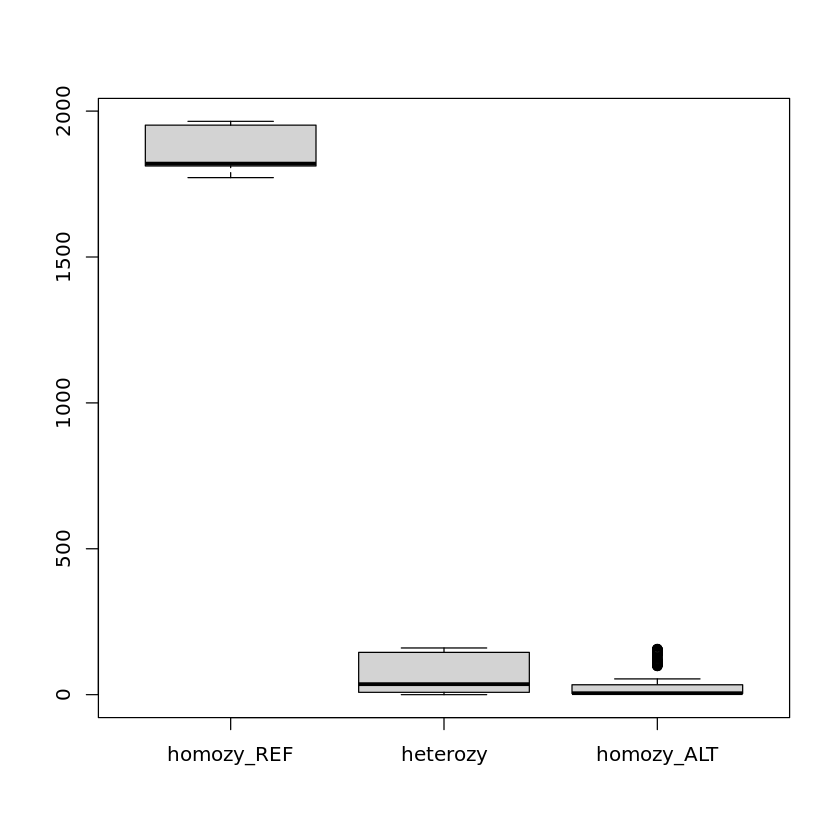

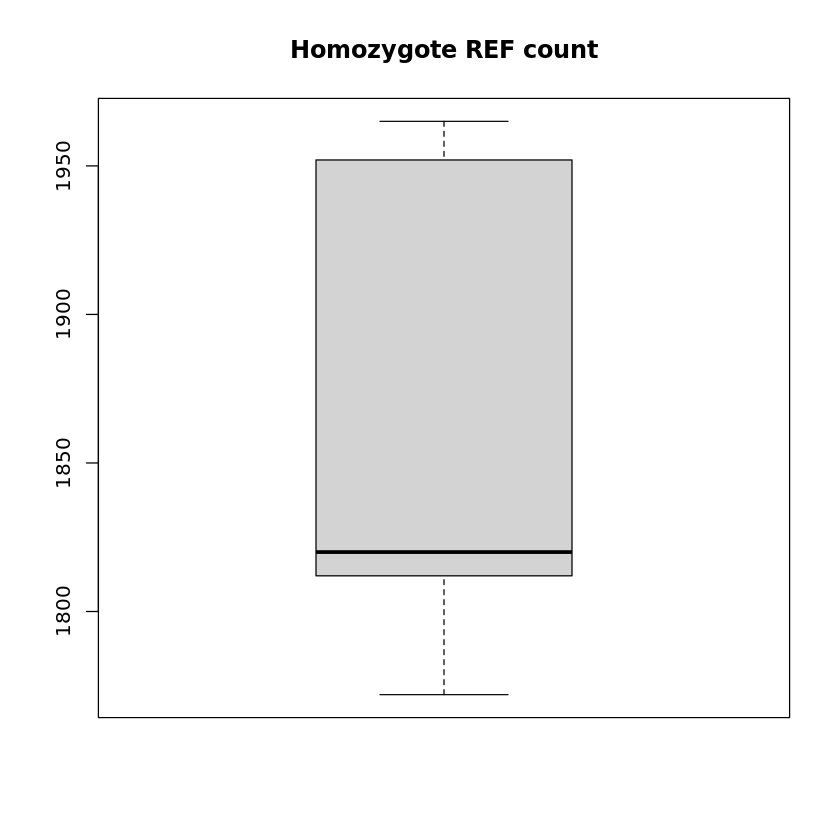

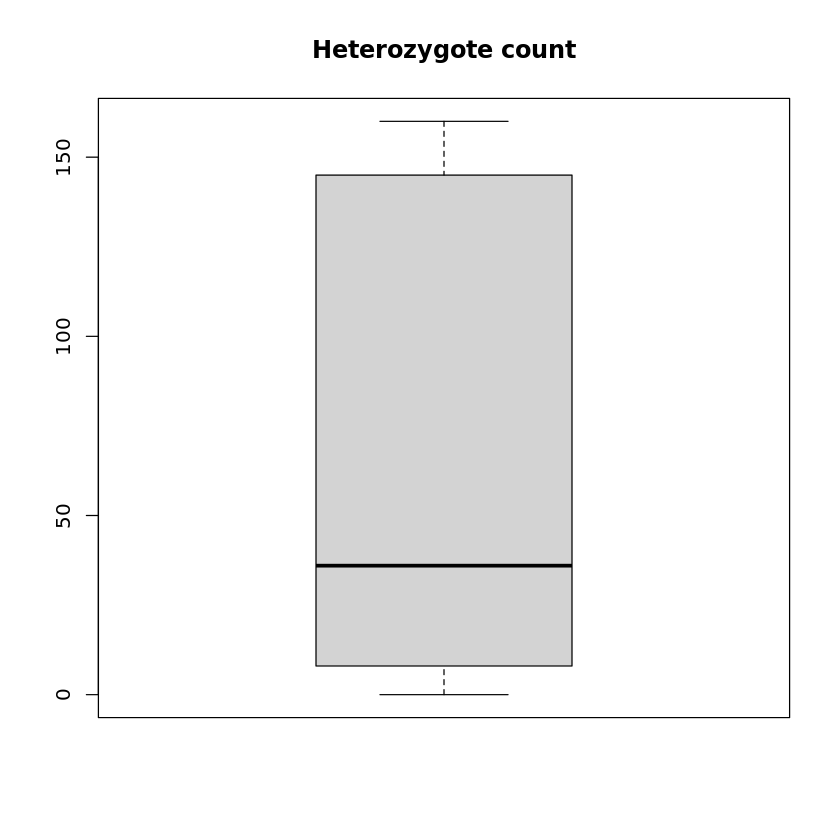

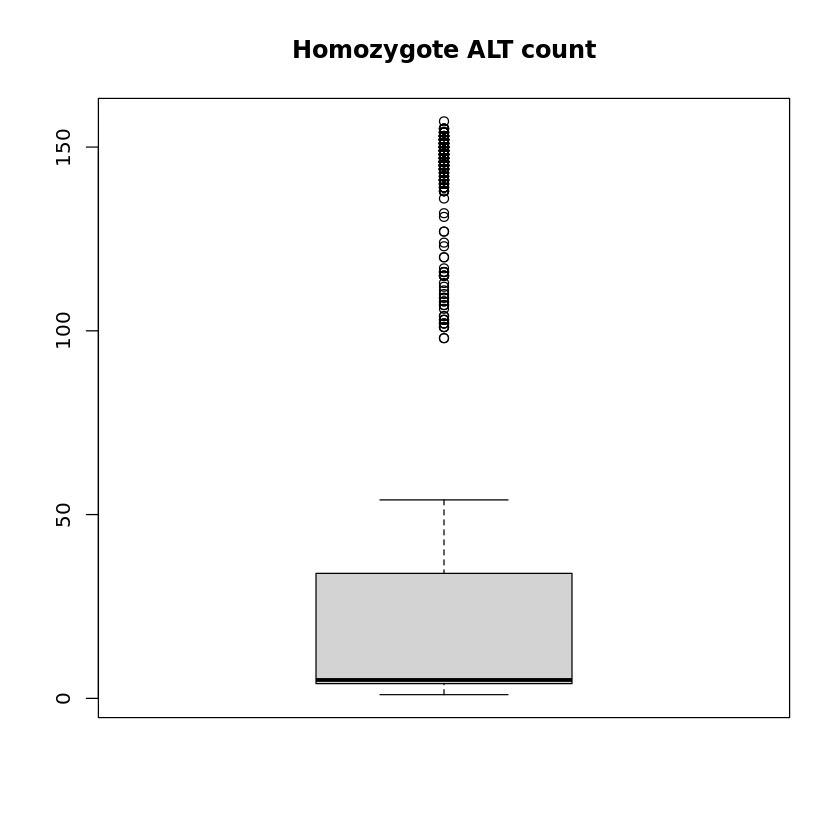

In [14]:
##### cell 14

# On the same scale
boxplot(zygo_df)
# to each it's own
boxplot(zygo_df$homozy_REF, main = 'Homozygote REF count')
boxplot(zygo_df$heterozy, main = 'Heterozygote count')
boxplot(zygo_df$homozy_ALT, main = 'Homozygote ALT count')

<div class="alert alert-warning"> 
    Question 4) :
    <br>
         &emsp;Complétez la commande suivante pour faire apparaître l'histogramme sans la catégorie <code>homozy_REF</code>.
</div>

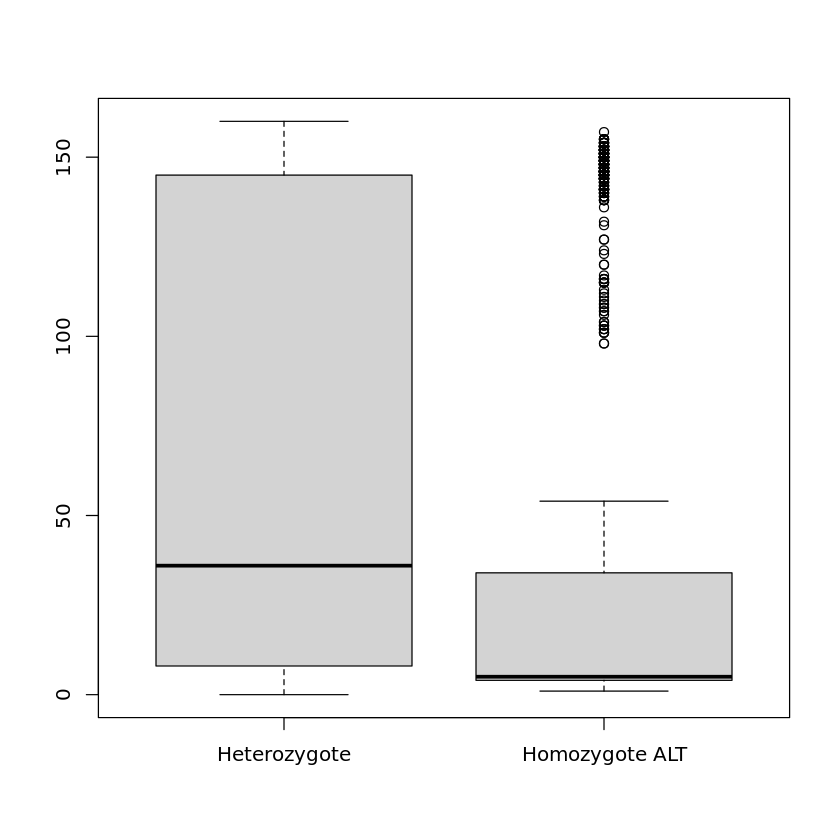

In [15]:
##### cell 15

# Without the homozy_ref, just heterozy and homozy_ALT
boxplot(zygo_df$heterozy, zygo_df$homozy_ALT, names = c('Heterozygote', 'Homozygote ALT')) # XXX instead of homozy_ALT

## Pathogénicité des variants

Nous allons ici observer et comparer plusieurs scores qui se proposent d'évaluer la pathogénicité d'un variant.
<br>
Nous avons choisi les scores suivants: 
- DANN (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4341060/)
- REVEL (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5065685/)
- CADD (https://cadd.gs.washington.edu/)
- VEST_4 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3665549/)

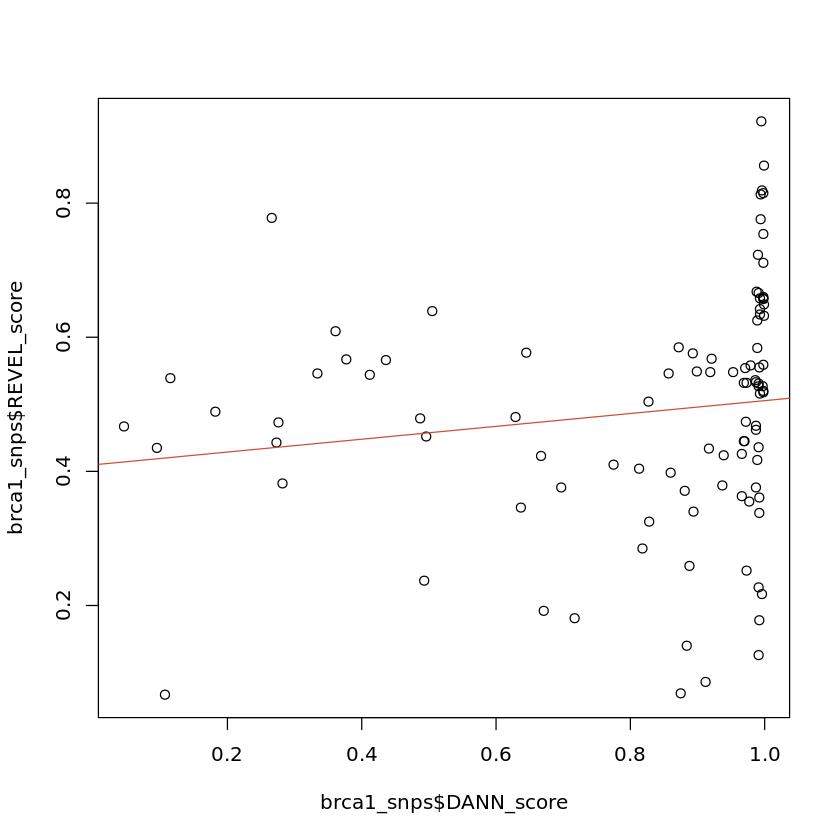

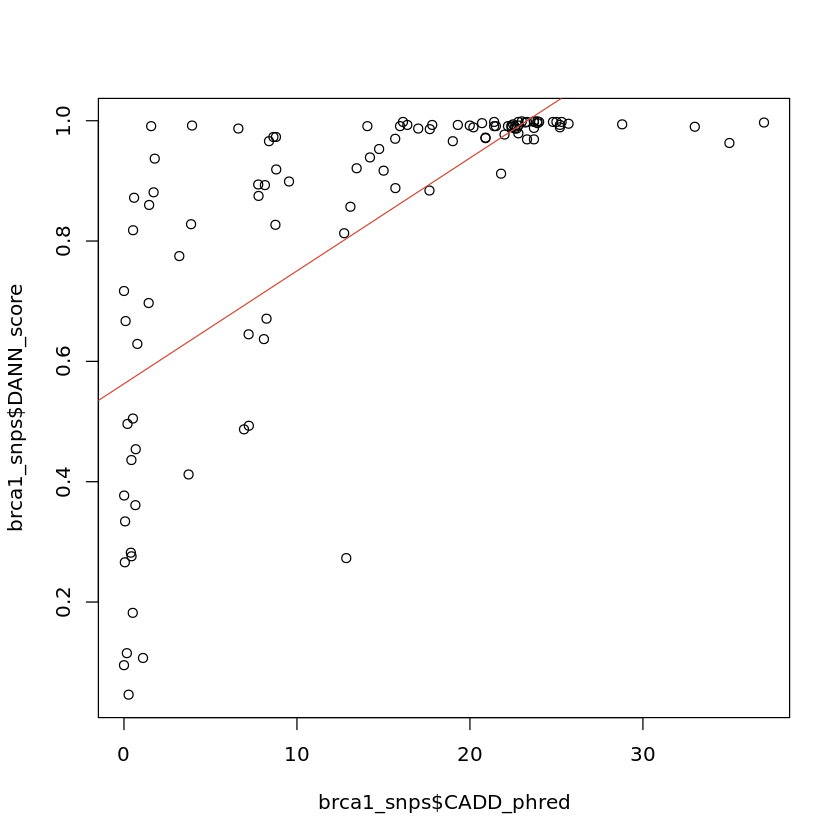

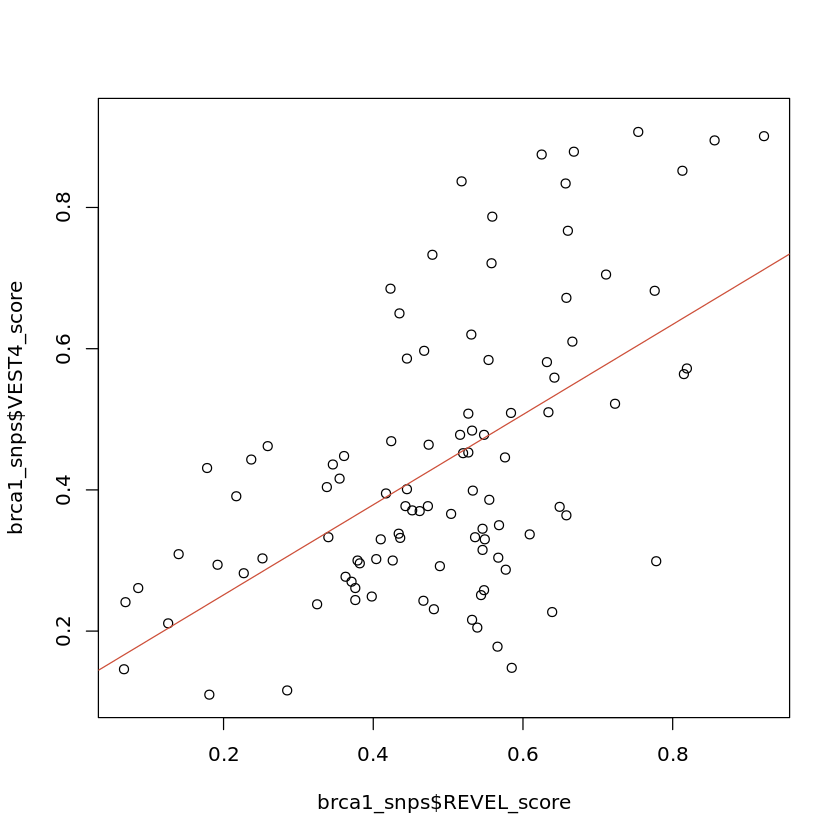

In [16]:
##### cell 16

# Correlation
# between pathogeneicity scores:
plot(brca1_snps$DANN_score, brca1_snps$REVEL_score)
abline(lm(formula = REVEL_score ~ DANN_score, data = brca1_snps), col = 'tomato3')

plot(x = brca1_snps$CADD_phred, y = brca1_snps$DANN_score)
abline(lm(formula = DANN_score ~ CADD_phred, data = brca1_snps),  col = 'tomato3')

plot(brca1_snps$REVEL_score, brca1_snps$VEST4_score)
abline(lm(formula = VEST4_score ~ REVEL_score, data = brca1_snps),  col = 'tomato3')

In [17]:
##### cell 17

# Statistical testing
cor.test(brca1_snps$REVEL_score, brca1_snps$DANN_score, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's
cat(sep)
cor.test(brca1_snps$CADD_phred, brca1_snps$DANN_score, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's
cat(sep)
cor.test(brca1_snps$REVEL_score, brca1_snps$VEST4_score, 
         alternative = 'two.sided', 
         method = 'pearson', 
         use = 'complete.obs') # complete to eliminate the NA's


	Pearson's product-moment correlation

data:  brca1_snps$REVEL_score and brca1_snps$DANN_score
t = 1.4353, df = 98, p-value = 0.1544
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05446799  0.33058638
sample estimates:
      cor 
0.1434852 



 ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ 



	Pearson's product-moment correlation

data:  brca1_snps$CADD_phred and brca1_snps$DANN_score
t = 10.101, df = 102, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5957152 0.7919074
sample estimates:
      cor 
0.7071713 



 ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ 



	Pearson's product-moment correlation

data:  brca1_snps$REVEL_score and brca1_snps$VEST4_score
t = 6.8442, df = 98, p-value = 6.727e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4190798 0.6882292
sample estimates:
      cor 
0.5686865 


<div class="alert alert-warning"> 
    Question 5) :
    <br>
    &emsp;Commentez brièvement (un court paragraphe) les résultats des <i>cells</i> 16 et 17 et expliquez si ils représentent selon vous un problème.
</div>

### Intron, exons et pathogénicité
Les analyses suivantes visent à déterminer si il existe une différence de pathogénicité pour les variants de _BRCA1_ selon leur localisation dans les exons ou dans les introns.

In [18]:
##### cell 18

# Subsetting and comparing exonic and intronic patho scores
table(brca1_snps$Func.refGene)


downstream     exonic   intronic   splicing       UTR3       UTR5 
        25        151       1744          3         33         13 

<div class="alert alert-warning"> 
    Question 6) :
    <br>
    &emsp;Complétez la <i>cell</i> 19 pour connaitre le nombre de données manquantes pour le score DANN  dans la catégorie <code>is_intronic</code>.
</div>

In [19]:
##### cell 19

is_exonic <- 
  brca1_snps$Func.refGene == 'exonic'

is_intronic <- 
  brca1_snps$Func.refGene == 'intronic'

sum(is.na(brca1_snps$DANN_score[is_exonic]))
sum(is.na(brca1_snps$DANN_score[is_intronic])) # XXX

[1] 49

[1] 1743

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0460  0.7845  0.9690  0.8228  0.9920  0.9990      49 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.454   0.454   0.454   0.454   0.454   0.454    1743 

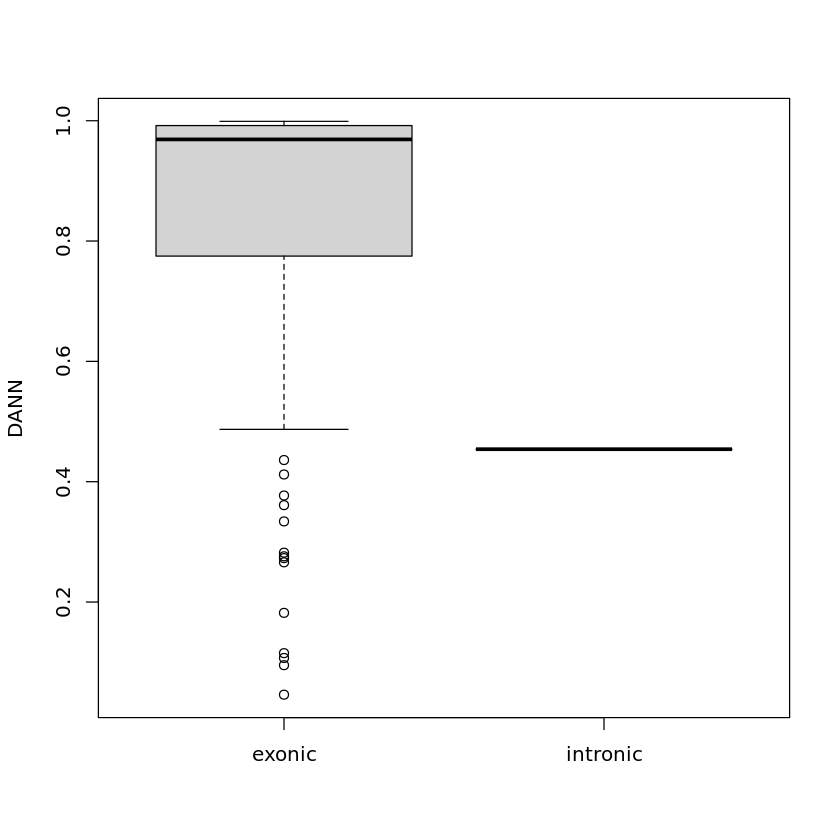

In [20]:
##### cell 20

summary(brca1_snps$DANN_score[is_exonic], na.rm = TRUE)
summary(brca1_snps$DANN_score[is_intronic], na.rm = TRUE)

boxplot(brca1_snps$DANN_score[is_exonic], brca1_snps$DANN_score[is_intronic], 
        names = c('exonic', 'intronic'), ylab = 'DANN')

<div class="alert alert-warning"> 
    Question 7) :
    <br>
         &emsp;Pouvez-vous effectuer un test statistique afin de savoir si la différence de pathogénicité prédite par le score DANN selon la localistion exon | intron d'un SNP est significative ?
</div>

## Etude des génotypes des populations

In [21]:
##### cell 21
#  metadata and SNPS
brca1_genotypes <- 
  brca1_genotypes[, colnames(brca1_genotypes) %in% metadata$SampleID]

metadata_filt <- 
  metadata[metadata$SampleID %in% colnames(brca1_genotypes), ]

Nous créons ici des filtres pour les différentes catégories de populations:
- Hommes
- Femmes
- Afrique (AFR)
- Asie de l'est (EAS)
- Asie du sud (SAS)

<div class="alert alert-warning"> 
    Question 8) :
    <br>
         &emsp; Complétez la commande suivante pour créer le vecteur <code>sample_AFR</code>.
</div>

In [22]:
##### cell 22

# Comparing the number of ALT between population
# creating filters

sample_man <- 
  metadata_filt$SampleID[metadata_filt$Sex == 1]

sample_wom <- 
  metadata_filt$SampleID[metadata_filt$Sex == 2]

sample_AFR <- 
  metadata_filt$SampleID[metadata_filt$Superpopulation == 'AFR'] # XXX

sample_EAS <- 
  metadata_filt$SampleID[metadata_filt$Superpopulation == 'EAS']

sample_SAS <- 
  metadata_filt$SampleID[metadata_filt$Superpopulation == 'SAS']

sample_three_pop <- 
  c(sample_AFR, sample_EAS, sample_SAS)

In [23]:
##### cell 23

## Filtering
brca1_wom <- brca1_genotypes[ ,sample_wom]
brca1_man <- brca1_genotypes[ ,sample_man]
brca1_AFR <- brca1_genotypes[ ,sample_AFR]
brca1_EAS <- brca1_genotypes[ ,sample_EAS]
brca1_SAS <- brca1_genotypes[ ,sample_SAS]

On calcule ensuite le nombre et la proportion d'allèles alternatifs présents dans les différentes populations.

In [24]:
##### cell 24
## Counting

sum(brca1_wom)
sum(brca1_man)
cat(sep)
sum(brca1_AFR)
sum(brca1_EAS)
sum(brca1_SAS)
cat(sep)
sum(brca1_wom) / sum(brca1_genotypes)
sum(brca1_man) / sum(brca1_genotypes)
cat(sep)
sum(brca1_AFR) / sum(brca1_genotypes)
sum(brca1_EAS) / sum(brca1_genotypes)
sum(brca1_SAS) / sum(brca1_genotypes)

[1] 163210

[1] 163024


 ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ 


[1] 84028

[1] 60771

[1] 79504


 ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ 


[1] 0.5002851

[1] 0.4997149


 ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ 


[1] 0.2575697

[1] 0.1862804

[1] 0.2437024

<div class="alert alert-warning"> 
    Question 9) :
    <br>
         &emsp; Commentez brièvement (un ou deux court·s paragraphe·s) les différences d'hétérozygotie dans les populations comparées ici.
</div>

## Etude de SNP d'intérêt

La fonction suivante vous est donnée afin de pouvoir effectuer des tests de ${\chi}^2$ ou des test exact de Fisher sur la présence de SNP d'intérêt entre deux populations.
Ici, le test exact de Fisher nous donnera la même information qu'un test de ${\chi}^2$ mais il est dit _exact_ car le calcul de la valeur _p_ ne dépend pas d'un calcul basé sur un approximation...

In [25]:
##### cell 25

# Function for statistical test between two populations
stat_test <- function(matrix_1, matrix_2, wanted_snp, fisher = FALSE) {
  tab_1 <- table(matrix_1[wanted_snp, ])
  tab_2 <- table(matrix_2[wanted_snp, ])
  name_1 <- deparse(substitute(matrix_1))
  name_2 <- deparse(substitute(matrix_2))
  # Replace empty values by zeroes if needed
  if(is.na(tab_1[2])) tab_1[2] <- 0
  if(is.na(tab_2[2])) tab_2[2] <- 0
  if(is.na(tab_1[3])) tab_1[3] <- 0
  if(is.na(tab_2[3])) tab_2[3] <- 0
  
  cont_tab <- rbind(tab_1, tab_2)
  rownames(cont_tab) <- c(name_1, name_2)
  colnames(cont_tab) <- 0:2  
  print(cont_tab)
  
  if(fisher == TRUE) {
    out_fish <- fisher.test(cont_tab)
    return(out_fish)
  }
  
  out_chi <- chisq.test(cont_tab)
  return(out_chi)
}

In [26]:
##### cell 26
wanted_snp_1 <- brca1_snps$avsnp150 == 'rs8176166'

In [27]:
##### cell 27
print('rs8176166 : ')
stat_test(matrix_1 = brca1_AFR, matrix_2 = brca1_SAS, wanted_snp = wanted_snp_1)
print('rs8176166 : ')
stat_test(matrix_1 = brca1_AFR, matrix_2 = brca1_EAS, wanted_snp = wanted_snp_1)
print('rs8176166 : ')
stat_test(matrix_1 = brca1_SAS, matrix_2 = brca1_EAS, wanted_snp = wanted_snp_1)
cat(sep)
print('rs8176166 : ')
stat_test(matrix_1 = brca1_AFR, matrix_2 = brca1_SAS, wanted_snp = wanted_snp_1, fisher = TRUE)
print('rs8176166 : ')
stat_test(matrix_1 = brca1_AFR, matrix_2 = brca1_EAS, wanted_snp = wanted_snp_1, fisher = TRUE)
print('rs8176166 : ')
stat_test(matrix_1 = brca1_SAS, matrix_2 = brca1_EAS, wanted_snp = wanted_snp_1, fisher = TRUE)

[1] "rs8176166 : "
            0   1  2
brca1_AFR 564  92  4
brca1_SAS 208 233 48



	Pearson's Chi-squared test

data:  cont_tab
X-squared = 242.49, df = 2, p-value < 2.2e-16


[1] "rs8176166 : "
            0  1 2
brca1_AFR 564 92 4
brca1_EAS 420 80 4


Warning message in chisq.test(cont_tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  cont_tab
X-squared = 1.0215, df = 2, p-value = 0.6


[1] "rs8176166 : "
            0   1  2
brca1_SAS 208 233 48
brca1_EAS 420  80  4



	Pearson's Chi-squared test

data:  cont_tab
X-squared = 183.4, df = 2, p-value < 2.2e-16



 ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ ¤ 
[1] "rs8176166 : "
            0   1  2
brca1_AFR 564  92  4
brca1_SAS 208 233 48



	Fisher's Exact Test for Count Data

data:  cont_tab
p-value < 2.2e-16
alternative hypothesis: two.sided


[1] "rs8176166 : "
            0  1 2
brca1_AFR 564 92 4
brca1_EAS 420 80 4



	Fisher's Exact Test for Count Data

data:  cont_tab
p-value = 0.6087
alternative hypothesis: two.sided


[1] "rs8176166 : "
            0   1  2
brca1_SAS 208 233 48
brca1_EAS 420  80  4



	Fisher's Exact Test for Count Data

data:  cont_tab
p-value < 2.2e-16
alternative hypothesis: two.sided


<div class="alert alert-warning"> 
    Question 10) :
    <br>
         &emsp;En observant les différentes table de contingence et les résultats des tests statistiques, diriez-vous pour le SNP considéré que les affirmations suivantes sont vraies ?:
    <br>
    &emsp; - Les populations <code>AFR</code> et <code>EAS</code> sont plus proches entre elles qu'elles ne le sont de <code>SAS</code>
    <br>
    &emsp; - Les populations <code>EAS</code> et <code>SAS</code> sont plus proches entre elles qu'elles ne le sont de <code>AFR</code>
    <br>
    &emsp; - Ces résultats sont généralisables à l'ensemble des SNP du génome.
    <br>
    &emsp; - le test de Chi^2 entre <code>AFR</code> et <code>EAS</code> envoie un <i>warning message</i> car l'une des catégories présente un faible effectif.
</div>

## Analyse multidimensionnelle

La section suivante est un bonus et ne comptera que positiviement dans la note finale.

Regardez la vidéo suivante afin de comprendre la PCA en 5 minutes https://youtu.be/HMOI_lkzW08 !

<div class="alert alert-block alert-danger">
    <b>Attention:</b> 
    La commande suivante peut prendre un peu de temps (environ 4 à 5 minutes) de calcul. Lancez-là pendant que vous regardez la vidéo.
    <br>
    Patience patience ...
</div>

In [28]:
##### cell 27
# PCA
system.time({
brca1_pca <- 
  FactoMineR::PCA(X = t(brca1_genotypes), ncp = 2, graph = FALSE)
 })

   user  system elapsed 
217.962 444.376 151.740 

In [29]:
##### cell 28
brca1_pca_forplot <-
  cbind(brca1_pca$ind$coord[,1:2], metadata_filt)

Représentation des deux premières dimensions (principal components) avec les points (qui représentent donc les individus) colorés en fonction du sexe.

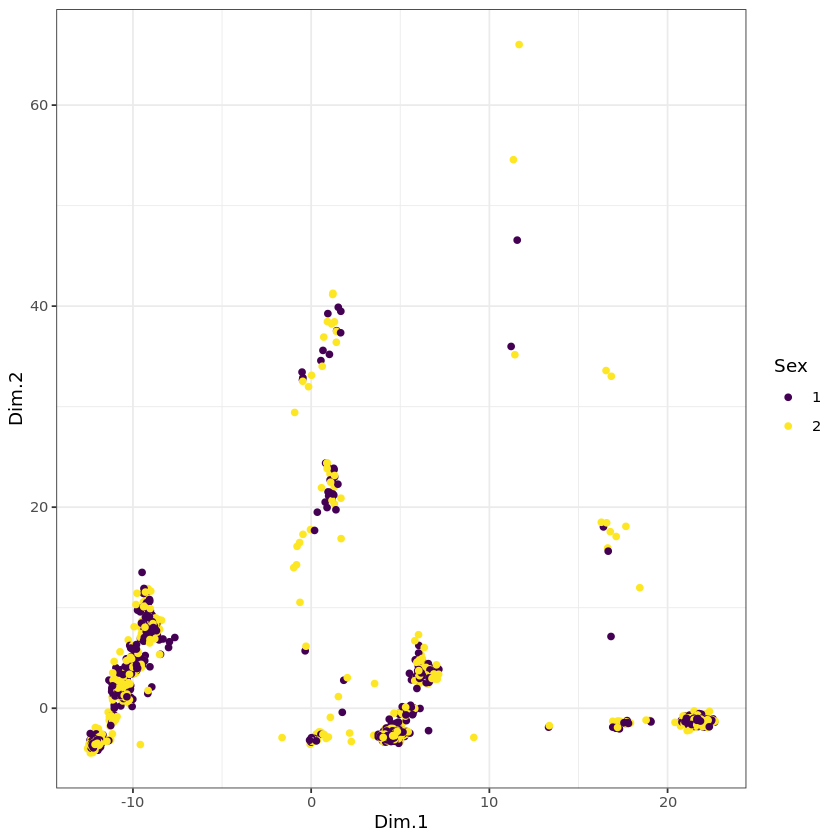

In [30]:
##### cell 29
ggplot(as.data.frame(brca1_pca_forplot)) +
  geom_point(aes(x = Dim.1, y = Dim.2, colour = Sex)) +
  scale_colour_viridis_d() +
  theme_bw()

Représentation des deux premières dimensions (principal components) avec les points (qui représentent donc les individus) colorés en fonction de la population.

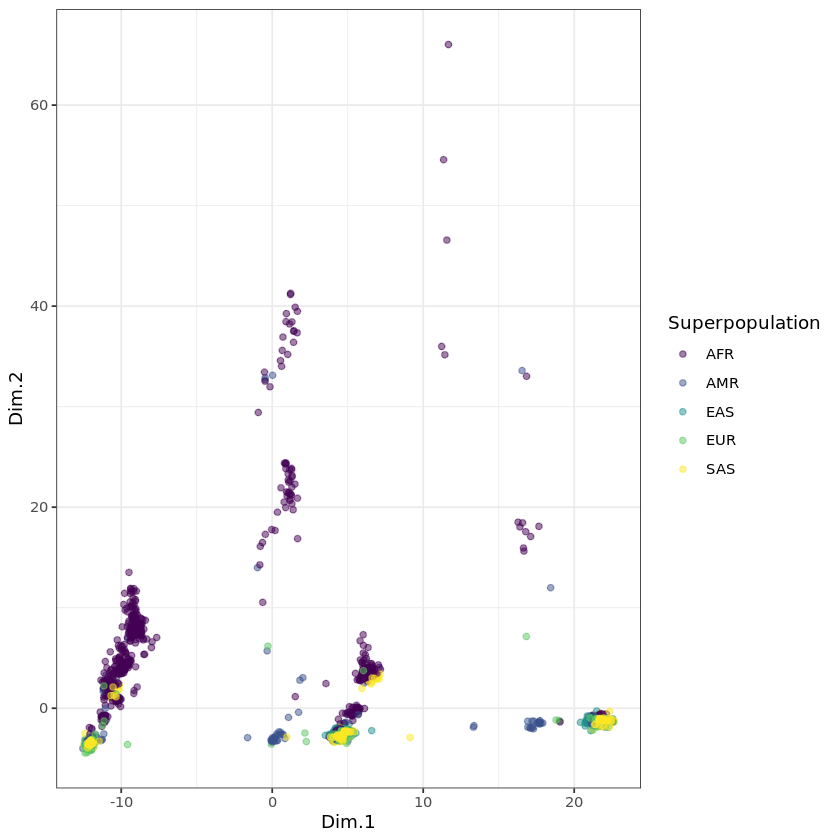

In [31]:
##### cell 30
ggplot(as.data.frame(brca1_pca_forplot)) +
  geom_point(aes(x = Dim.1, y = Dim.2, colour = Superpopulation), alpha = 0.5) +
  scale_colour_viridis_d() +
  theme_bw()

<div class="alert alert-warning"> 
    Question bonus) :
    <br>
         &emsp; Décrivez et essayez d'interpreter les graphiques issus de cette PCA.
</div>